In [28]:
import requests
import base64
import json
from datetime import datetime, timedelta

# Replace these with your own credentials
client_id = '6de8a27421474b9180b4c22b6027b034'
client_secret = '01024a70b1f2428284b7767a6152602a'

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')

# Function to get the most played song genres from 5 years ago
def get_most_played_genres(access_token):
    api_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {'Authorization': f'Bearer {access_token}'}
    five_years_ago = datetime.now() - timedelta(days=5*365)
    params = {'time_range': 'long_term', 'limit': 10, 'offset': 0, 'country': 'US'}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        categories = response.json()['categories']['items']
        most_played_genres = [category['name'] for category in categories]
        return most_played_genres
    else:
        raise Exception(f'Failed to get most played song genres. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)
    most_played_genres = get_most_played_genres(access_token)
    print("Most played song genres from 5 years ago:")
    for genre in most_played_genres:
        print(f"- {genre}")


Most played song genres from 5 years ago:
- Top Lists
- Hip-Hop
- Pop
- Country
- Latin
- Rock
- Summer
- Workout
- R&B
- Dance/Electronic


In [29]:

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')
# Function to search for artists
def search_artists(access_token, query, limit=50):
    api_url = 'https://api.spotify.com/v1/search'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'q': query, 'type': 'artist', 'limit': limit}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        artists = response.json()['artists']['items']
        return artists
    else:
        raise Exception(f'Failed to search for artists. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for artists 
    artists = search_artists(access_token, 'pop')

    # Get artist names and popularity scores
    artist_popularity = [(artist['name'], artist['popularity']) for artist in artists]

    # Sort artists by popularity and get the top 20
    top_20_artists = sorted(artist_popularity, key=lambda x: x[1], reverse=True)[:20]

    # Print the top 20 artists
    print("Top 20 artists:")
    for idx, (name, popularity) in enumerate(top_20_artists, 1):
        print(f"{idx}. {name} (Popularity: {popularity})")


Top 20 artists:
1. The Weeknd (Popularity: 98)
2. Miley Cyrus (Popularity: 93)
3. Rihanna (Popularity: 93)
4. Ariana Grande (Popularity: 92)
5. Ed Sheeran (Popularity: 92)
6. Harry Styles (Popularity: 91)
7. Sam Smith (Popularity: 89)
8. Lady Gaga (Popularity: 88)
9. Katy Perry (Popularity: 86)
10. Pop Smoke (Popularity: 84)
11. Paramore (Popularity: 82)
12. Fall Out Boy (Popularity: 81)
13. My Chemical Romance (Popularity: 79)
14. All Time Low (Popularity: 73)
15. Popcaan (Popularity: 69)
16. Icona Pop (Popularity: 68)
17. The Wanted (Popularity: 66)
18. Poppy (Popularity: 61)
19. Pop Evil (Popularity: 61)
20. Poppy Baskcomb (Popularity: 60)


In [30]:
import pandas as pd

# Create a DataFrame from the top 20 artists list
top_20_artists_df = pd.DataFrame(top_20_artists, columns=['Artist', 'Popularity'])

# Print the DataFrame
print(top_20_artists_df)


                 Artist  Popularity
0            The Weeknd          98
1           Miley Cyrus          93
2               Rihanna          93
3         Ariana Grande          92
4            Ed Sheeran          92
5          Harry Styles          91
6             Sam Smith          89
7             Lady Gaga          88
8            Katy Perry          86
9             Pop Smoke          84
10             Paramore          82
11         Fall Out Boy          81
12  My Chemical Romance          79
13         All Time Low          73
14              Popcaan          69
15            Icona Pop          68
16           The Wanted          66
17                Poppy          61
18             Pop Evil          61
19       Poppy Baskcomb          60


In [31]:

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for rock artists
    rock_artists = search_artists(access_token, 'pop', limit=50)

    # Get artist names, popularity scores, and follower counts
    artist_data = [(artist['name'], artist['popularity'], artist['followers']['total']) for artist in rock_artists]

    # Sort artists by popularity and get the top 10
    top_20_rock_artists = sorted(artist_data, key=lambda x: x[1], reverse=True)[:20]

    # Create a DataFrame with the top 10 artists, their popularity, and follower counts
    top_20_rock_artists_df = pd.DataFrame(top_20_rock_artists, columns=['Artist', 'Popularity', 'Followers'])

    # Print the DataFrame
    print("Top 20 rock artists:")
    print(top_20_rock_artists_df)


Top 20 rock artists:
                 Artist  Popularity  Followers
0            The Weeknd          98   61407159
1           Miley Cyrus          93   20140407
2               Rihanna          93   53928858
3         Ariana Grande          92   88917092
4            Ed Sheeran          92  110663355
5          Harry Styles          91   26710666
6             Sam Smith          89   22140331
7             Lady Gaga          88   25701963
8            Katy Perry          86   25943897
9             Pop Smoke          84   12226891
10             Paramore          82    7648694
11         Fall Out Boy          81    9893880
12  My Chemical Romance          79    7510358
13         All Time Low          73    2915998
14              Popcaan          69     888360
15            Icona Pop          68     695787
16           The Wanted          66    2605871
17                Poppy          61    1231957
18             Pop Evil          61     512269
19       Poppy Baskcomb          60    

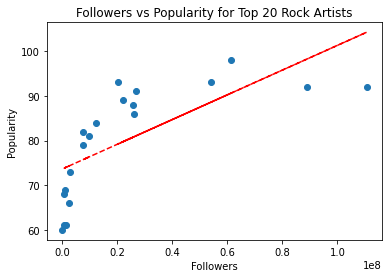

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot using the DataFrame columns
plt.scatter(top_20_rock_artists_df['Followers'], top_20_rock_artists_df['Popularity'])

# Calculate the trend line
z = np.polyfit(top_20_rock_artists_df['Followers'], top_20_rock_artists_df['Popularity'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(top_20_rock_artists_df['Followers'], p(top_20_rock_artists_df['Followers']), "r--")

# Add labels and title to the plot
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.title('Followers vs Popularity for Top 20 Rock Artists')

# Display the plot
plt.show()


In [33]:
# Function to get the top playlists for a given country
def get_top_playlists(access_token, country):
    api_url = 'https://api.spotify.com/v1/browse/featured-playlists'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'country': country, 'limit': 50}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        playlists = response.json()['playlists']['items']
        return playlists
    else:
        raise Exception(f'Failed to get top playlists for {country}. Status code: {response.status_code}')

# Function to get the tracks from a given playlist
def get_playlist_tracks(access_token, playlist_id):
    api_url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'limit': 100}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        tracks = response.json()['items']
        return tracks
    else:
        raise Exception(f'Failed to get tracks for playlist {playlist_id}. Status code: {response.status_code}')

# List of country codes
countries = ['US', 'GB', 'DE', 'FR', 'CA', 'AU', 'JP', 'BR', 'MX', 'IT', 'ES']

# Dictionary to store artist counts per country
artist_counts = {}

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Iterate through the countries
    for country in countries:
        artist_counts[country] = {}

        # Get the top 50 playlists for the country
        playlists = get_top_playlists(access_token, country)

        # Iterate through the playlists
        for playlist in playlists:
            playlist_id = playlist['id']

            # Get the tracks from the playlist
            tracks = get_playlist_tracks(access_token, playlist_id)

            # Iterate through the tracks
            for track in tracks:
                if track['track'] is not None:
                    artist = track['track']['artists'][0]['name']

                    # Increment artist count
                    if artist in artist_counts[country]:
                        artist_counts[country][artist] += 1
                    else:
                        artist_counts[country][artist] = 1

    # Convert the artist counts to DataFrames
    most_popular_artists_per_country = {}
    for country in countries:
        artists_df = pd.DataFrame(list(artist_counts[country].items()), columns=['Artist', 'Count'])
        artists_df = artists_df.sort_values(by='Count', ascending=False)


In [34]:
artists_df

,Artist,Count
8,Coldplay,13
33,Rihanna,12
6,Ed Sheeran,9
300,Beny Jr,8
301,Morad,8
...,...,...
241,Wiz Khalifa,1
240,Pitbull,1
239,Charlie Puth,1
238,Capital Cities,1


In [37]:
artists_df[:20]

,Artist,Count
8,Coldplay,13
33,Rihanna,12
6,Ed Sheeran,9
300,Beny Jr,8
301,Morad,8
0,Miley Cyrus,7
298,Eladio Carrion,7
4,Sam Smith,7
10,Harry Styles,7
26,Adele,7


In [40]:
import billboard
import datetime

# Function to get the top 50 artists from the Billboard Hot 100 chart 3 years ago
def get_top_artists_from_billboard(date):
    chart = billboard.ChartData('hot-100', date=date)
    top_artists = [entry.artist for entry in chart[:50]]
    return top_artists

# Calculate the date 3 years ago
three_years_ago = (datetime.datetime.now() - datetime.timedelta(days=3*365)).strftime('%Y-%m-%d')

# Get the top 50 artists from the Billboard Hot 100 chart 3 years ago
top_artists = get_top_artists_from_billboard(three_years_ago)

# Print the top 50 artists
print(f"Top 50 artists from the Billboard Hot 100 chart on {three_years_ago}:")
for idx, artist in enumerate(top_artists, 1):
    print(f"{idx}. {artist}")


Top 50 artists from the Billboard Hot 100 chart on 2020-03-26:
1. Roddy Ricch
2. The Weeknd
3. Dua Lipa
4. Future Featuring Drake
5. Post Malone
6. Arizona Zervas
7. Harry Styles
8. Justin Bieber Featuring Quavo
9. Lewis Capaldi
10. Billie Eilish
11. blackbear
12. Maroon 5
13. Lil Uzi Vert
14. Doja Cat Featuring Nicki Minaj
15. Tones And I
16. The Weeknd
17. Maren Morris
18. Camila Cabello Featuring DaBaby
19. Lil Uzi Vert Featuring Chief Keef
20. YNW Melly & Juice WRLD
21. Mustard & Roddy Ricch
22. Dan + Shay & Justin Bieber
23. Eminem Featuring Juice WRLD
24. DaBaby
25. Lady Gaga
26. Lil Uzi Vert & 21 Savage
27. Lil Uzi Vert
28. Lil Baby
29. Trevor Daniel
30. Black Eyed Peas X J Balvin
31. Selena Gomez
32. Chris Brown Featuring Drake
33. Roddy Ricch Featuring Mustard
34. Halsey
35. Kane Brown
36. Gabby Barrett Featuring Charlie Puth
37. Lil Uzi Vert
38. Lil Mosey
39. Jake Owen
40. Rod Wave
41. Lil Uzi Vert
42. Lil Uzi Vert
43. Demi Lovato
44. Lizzo
45. Lil Uzi Vert
46. Russ & BIA
47.